In [87]:
# Importing Libraries
import requests
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier

In [88]:
import pandas as pd
url_string="https://github.com/SowrovDey/Blood-Disease/blob/main/diagnosed_cbc_data_v4.csv"

In [89]:
df=pd.read_csv("diagnosed_cbc_data_v4.csv")
df

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,Normocytic hypochromic anemia
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,Normocytic hypochromic anemia
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,Iron deficiency anemia
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,Iron deficiency anemia
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,Normocytic hypochromic anemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,Healthy
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,Healthy
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,Healthy
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,Healthy


In [90]:
df.head(10)

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia
5,6.6,27.3,65.4,1.8,4.3,3.96,8.8,29.7,75.2,22.2,79.6,207.0,11.5,0.18,Other microcytic anemia
6,16.7,19.1,68.2,3.2,11.4,5.15,14.2,44.8,87.1,27.5,31.6,151.0,12.8,0.14,Leukemia
7,9.3,27.4,64.0,2.6,5.9,4.39,12.0,37.9,86.4,27.3,31.6,194.0,15.9,0.19,Normocytic hypochromic anemia
8,5.2,19.7,72.4,1.0,3.8,4.85,13.2,41.0,84.7,27.2,32.1,181.0,10.0,0.15,Healthy
9,10.5,12.4,79.0,1.3,8.3,4.57,12.4,38.9,85.3,27.1,31.8,164.0,11.3,0.14,Normocytic hypochromic anemia


In [91]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset :', df.shape[0])

Number of Features In Dataset : 15
Number of Instances In Dataset : 1281


In [92]:
# Drop the unnecessary column 'Diagnosis' if you want to keep only features for modeling
df = df.drop(columns=['Diagnosis'])


In [93]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset :', df.shape[0])

Number of Features In Dataset : 14
Number of Instances In Dataset : 1281


In [94]:
df.head()


,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WBC     1281 non-null   float64
 1   LYMp    1281 non-null   float64
 2   NEUTp   1281 non-null   float64
 3   LYMn    1281 non-null   float64
 4   NEUTn   1281 non-null   float64
 5   RBC     1281 non-null   float64
 6   HGB     1281 non-null   float64
 7   HCT     1281 non-null   float64
 8   MCV     1281 non-null   float64
 9   MCH     1281 non-null   float64
 10  MCHC    1281 non-null   float64
 11  PLT     1281 non-null   float64
 12  PDW     1281 non-null   float64
 13  PCT     1281 non-null   float64
dtypes: float64(14)
memory usage: 140.2 KB


In [96]:
df.describe()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.0000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,7.862717,25.845000,77.511000,1.880760,5.140940,4.708267,12.184551,46.1526,85.793919,32.084840,31.739149,229.981421,14.312512,0.260280
std,3.564466,7.038728,147.746273,1.335689,2.872294,2.817200,3.812897,104.8861,27.177663,111.170756,3.300352,93.019336,3.005079,0.685351
min,0.800000,6.200000,0.700000,0.200000,0.500000,1.360000,-10.000000,2.0000,-79.300000,10.900000,11.500000,10.000000,8.400000,0.010000
25%,6.000000,25.845000,71.100000,1.880760,5.100000,4.190000,10.800000,39.2000,81.200000,25.500000,30.600000,157.000000,13.300000,0.170000
50%,7.400000,25.845000,77.511000,1.880760,5.140940,4.600000,12.300000,46.1526,86.600000,27.800000,32.000000,213.000000,14.312512,0.260280
75%,8.680000,25.845000,77.511000,1.880760,5.140940,5.100000,13.500000,46.1526,90.200000,29.600000,32.900000,293.000000,14.700000,0.260280
max,45.700000,91.400000,5317.000000,41.800000,79.000000,90.800000,87.100000,3715.0000,990.000000,3117.000000,92.800000,660.000000,97.000000,13.600000


In [97]:
df.duplicated().sum()

np.int64(49)

In [98]:
df.isnull().sum()

WBC      0
LYMp     0
NEUTp    0
LYMn     0
NEUTn    0
RBC      0
HGB      0
HCT      0
MCV      0
MCH      0
MCHC     0
PLT      0
PDW      0
PCT      0
dtype: int64

In [99]:
df.isna().sum()

WBC      0
LYMp     0
NEUTp    0
LYMn     0
NEUTn    0
RBC      0
HGB      0
HCT      0
MCV      0
MCH      0
MCHC     0
PLT      0
PDW      0
PCT      0
dtype: int64

In [100]:
# Exploratory Data Analysis (EDA) - Graphical Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# For EDA, use only numeric columns to avoid ValueError with string columns like 'Diagnosis'
numeric_df = df.select_dtypes(include=['number'])



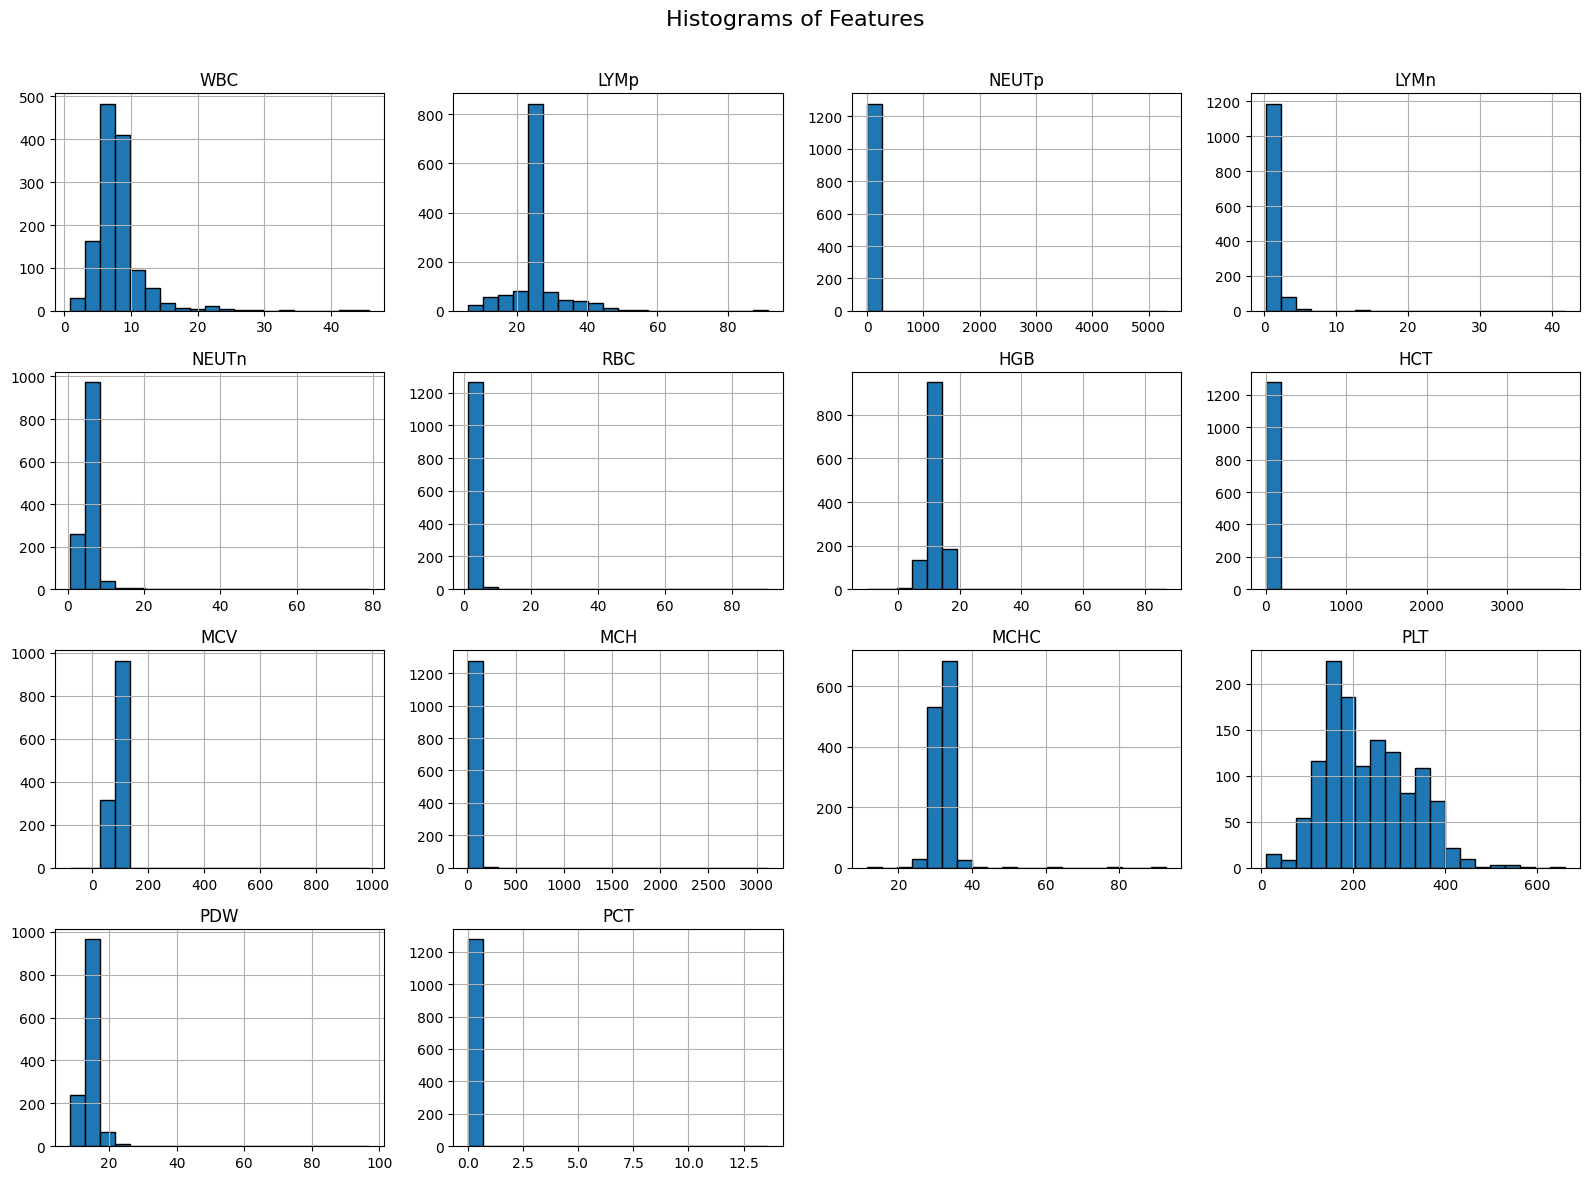

In [101]:
# 1. Histograms for all features
numeric_df.hist(figsize=(16, 12), bins=20, edgecolor='black')
plt.suptitle('Histograms of Features', fontsize=16)
plt.tight_layout(rect=(0, 0, 1, 0.97))
plt.show()

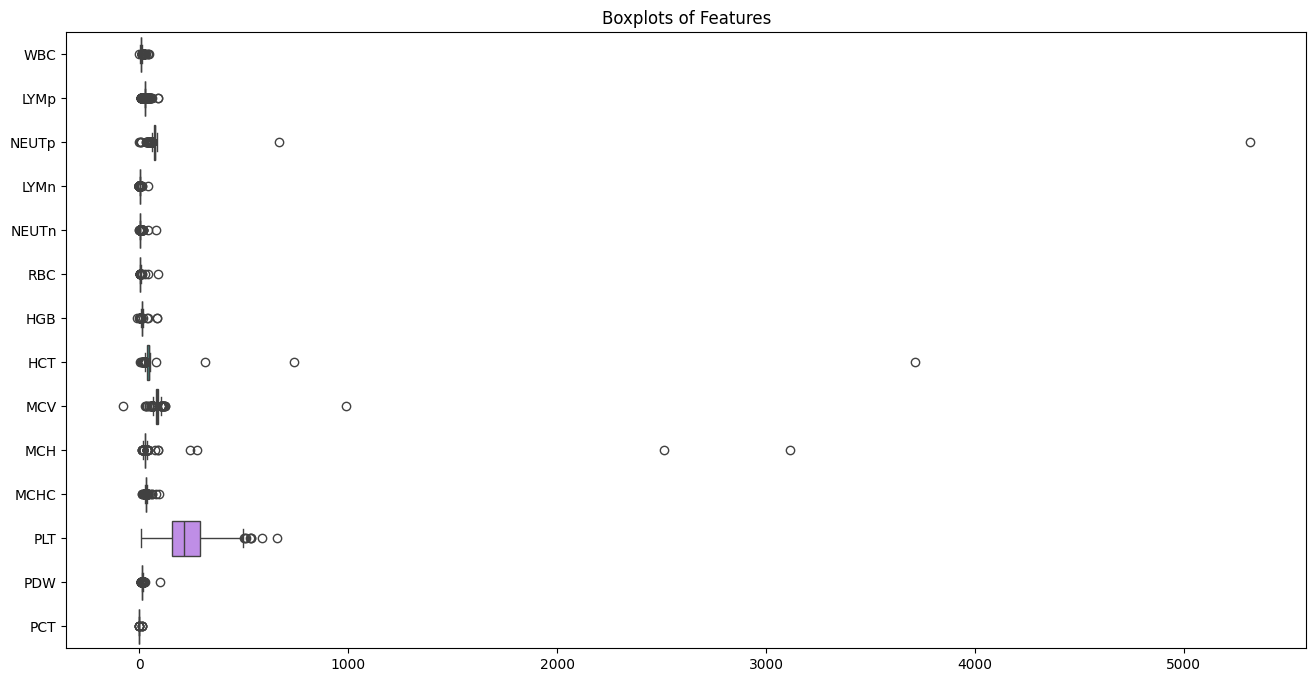

In [102]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=numeric_df, orient="h")
plt.title('Boxplots of Features')
plt.show()

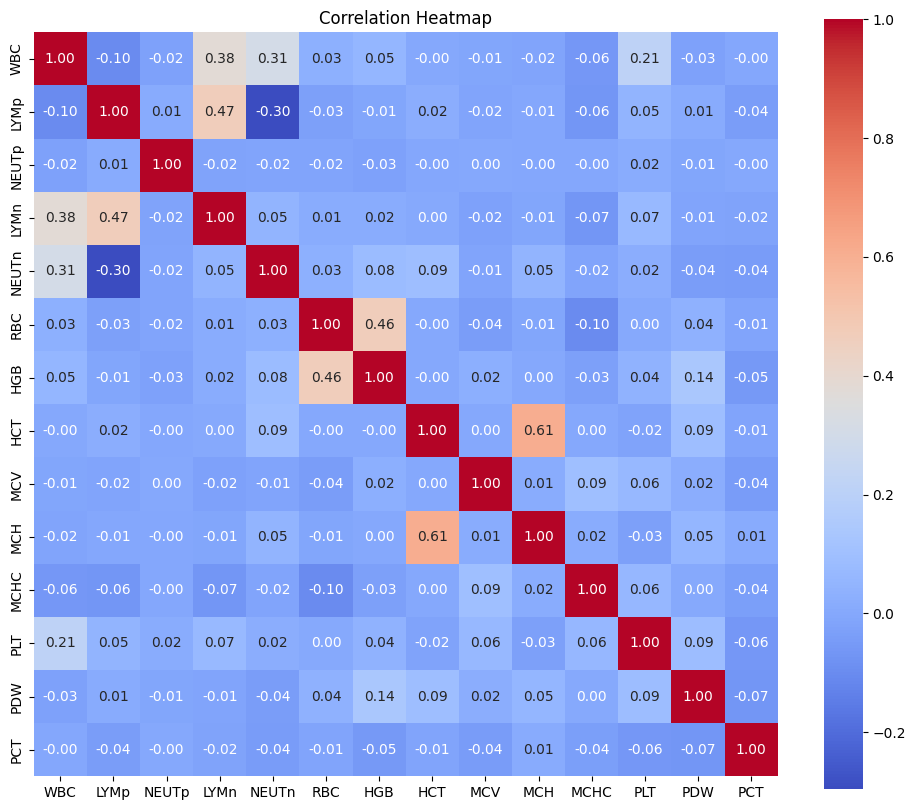

In [103]:
# 3. Correlation heatmap
plt.figure(figsize=(12, 10))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


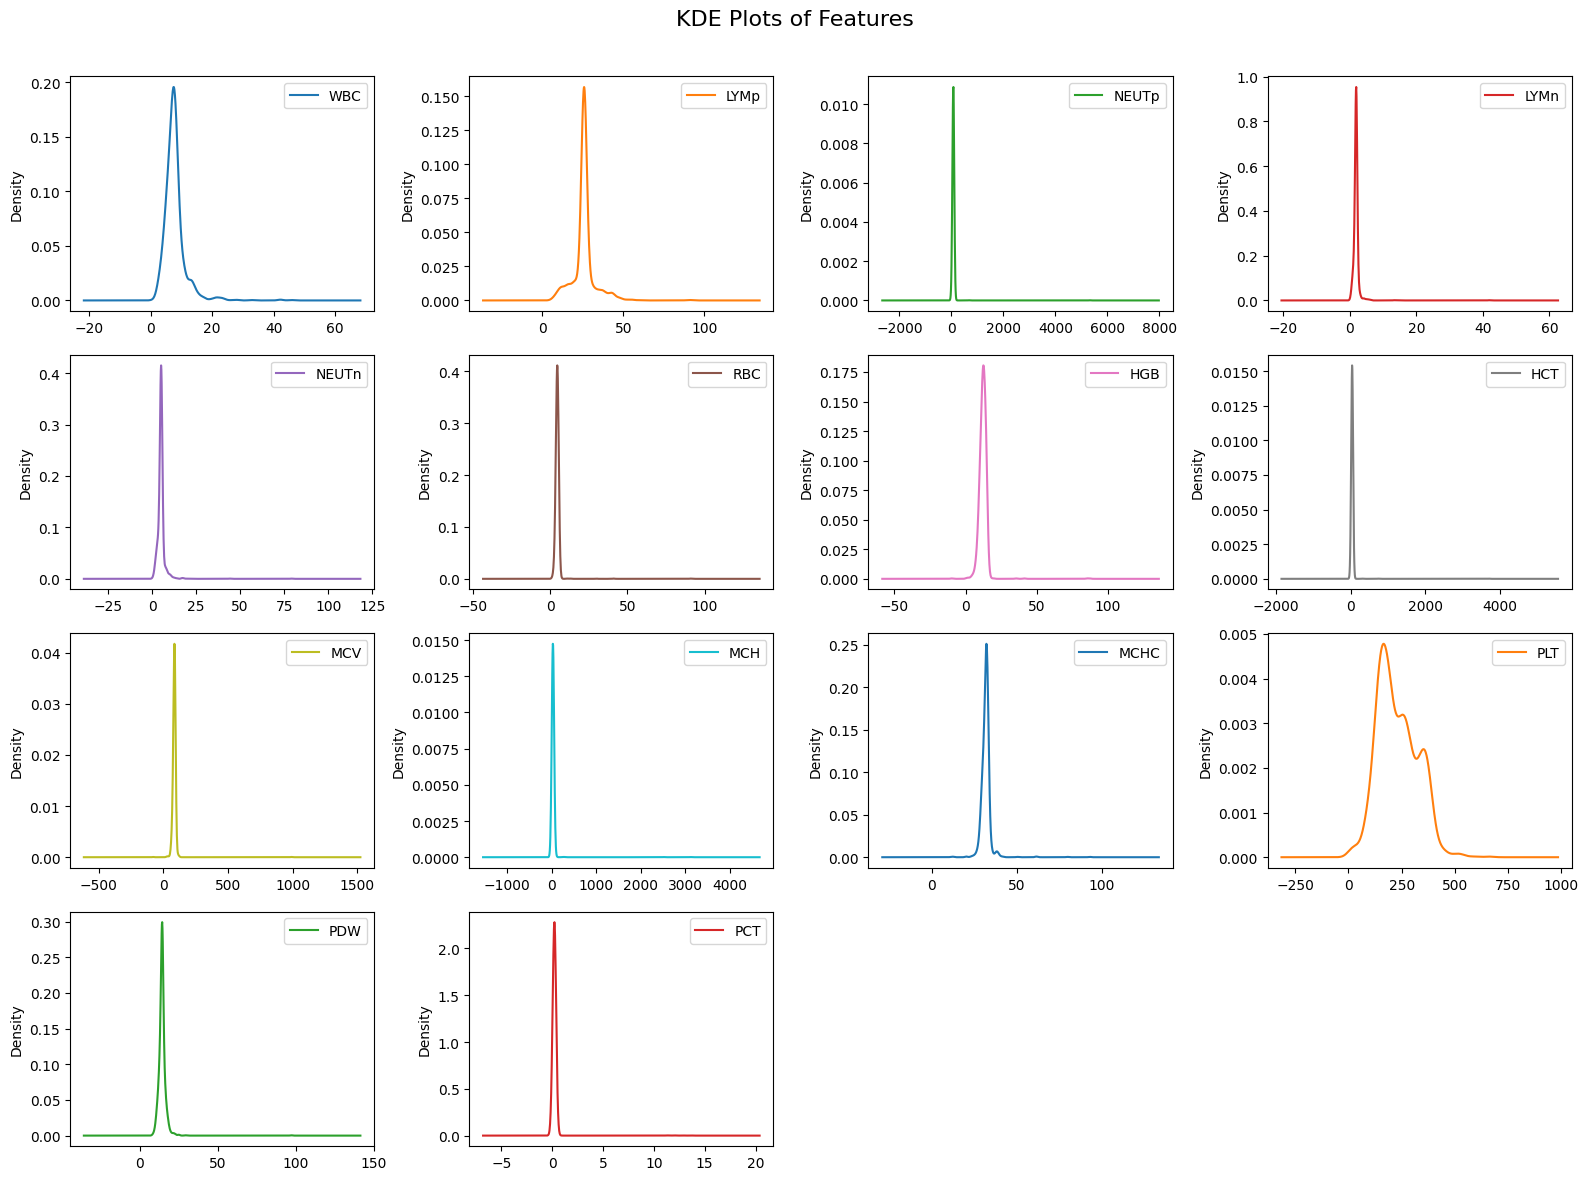

In [104]:
# 4. KDE plots for all features
numeric_df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(16, 12))
plt.suptitle('KDE Plots of Features', fontsize=16)
plt.tight_layout(rect=(0, 0, 1, 0.97))
plt.show()

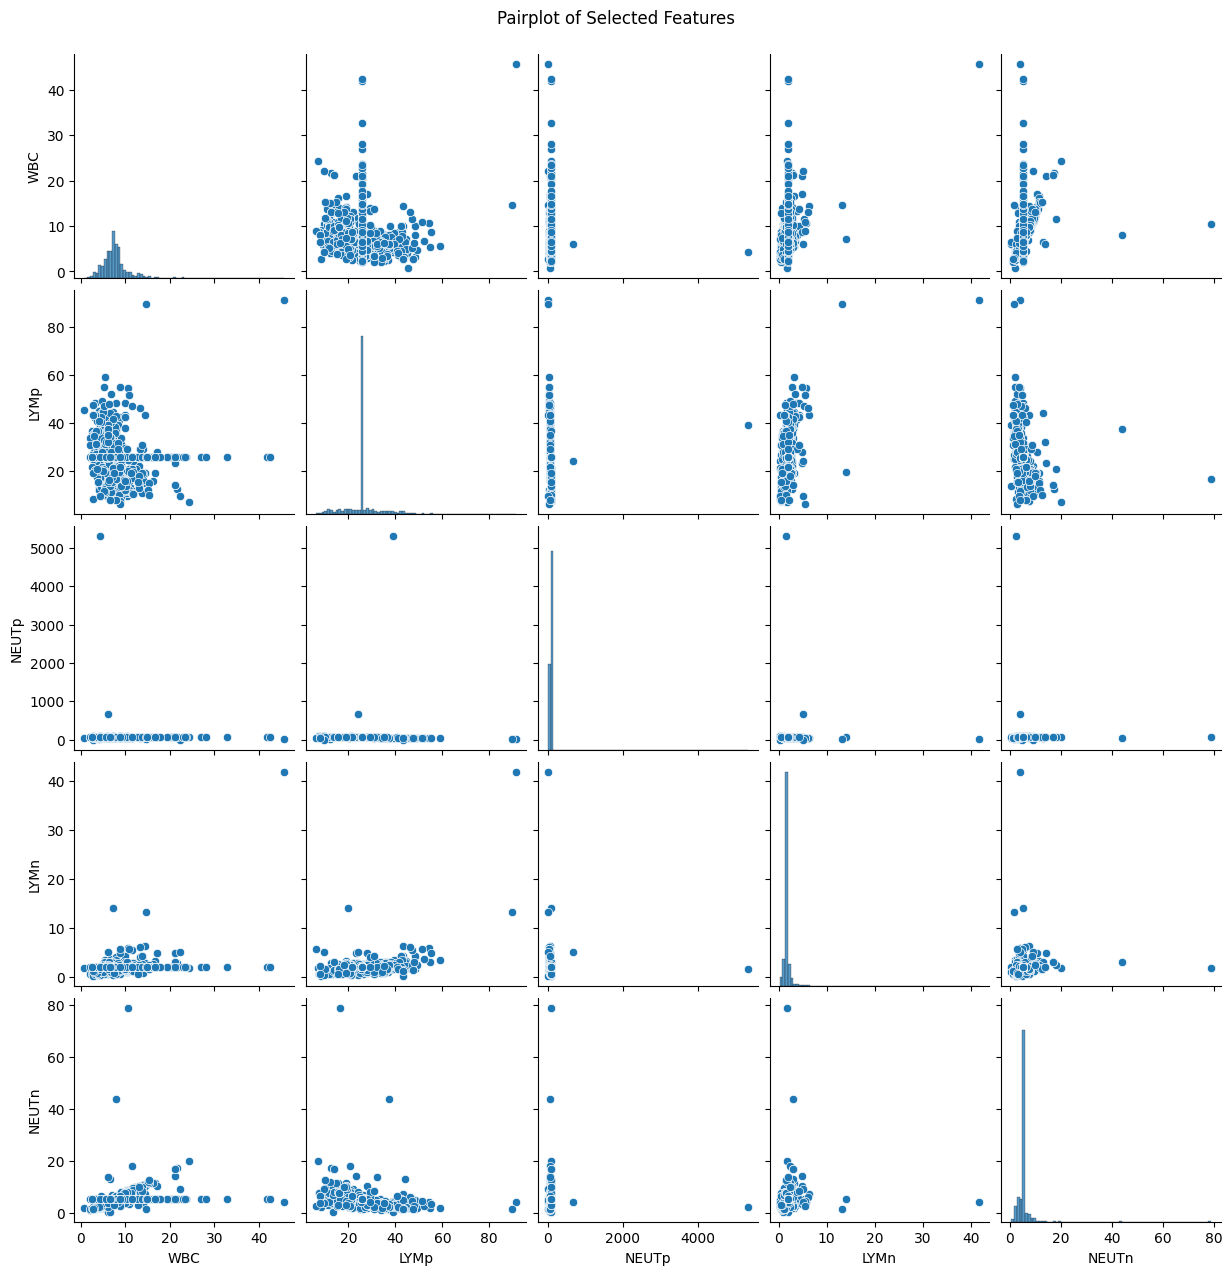

In [105]:
# 5. Pairplot for selected features (if too many features, select a few)
if isinstance(numeric_df, pd.DataFrame):
    selected_cols = numeric_df.columns[:5]  # Select first 5 numeric features for demonstration
    sns.pairplot(numeric_df[selected_cols].copy())
    plt.suptitle('Pairplot of Selected Features', y=1.02)
    plt.show()


Balancing Dataset

In [115]:
print(df.columns)

Index(['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV',
       'MCH', 'MCHC', 'PLT', 'PDW', 'PCT'],
      dtype='object')


In [116]:
import numpy as np

# For example: randomly assign 0 (Normal) or 1 (Disease)
df['Diagnosis'] = np.random.choice(['Normal', 'Disease'], size=len(df))

# Now you can proceed with your original code
target = df['Diagnosis']

Class Counts:
Disease: 661
Normal: 620


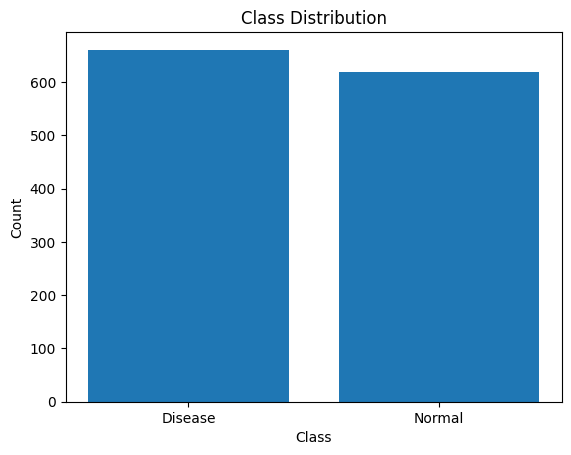

In [117]:
from collections import Counter
import matplotlib.pyplot as plt

# Get the target variable
target = df['Diagnosis']

# Count the number of each class
class_counts = Counter(target)

# Print the class counts
print("Class Counts:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

# Plot a bar chart of the class counts
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()



In [119]:
# Extracting Features Into Features & Target

# Define the features and target
features = df.drop('Diagnosis', axis=1)
target = df['Diagnosis']

# Display the first few rows of the features and target
print("Features:")
print(features.head())
print("\nTarget:")
print(target.head())


Features:
    WBC  LYMp  NEUTp  LYMn  NEUTn   RBC  HGB    HCT   MCV   MCH  MCHC    PLT  \
0  10.0  43.2   50.1   4.3    5.0  2.77  7.3   24.2  87.7  26.3  30.1  189.0   
1  10.0  42.4   52.3   4.2    5.3  2.84  7.3   25.0  88.2  25.7  20.2  180.0   
2   7.2  30.7   60.7   2.2    4.4  3.97  9.0   30.5  77.0  22.6  29.5  148.0   
3   6.0  30.2   63.5   1.8    3.8  4.22  3.8   32.8  77.9  23.2  29.8  143.0   
4   4.2  39.1   53.7   1.6    2.3  3.93  0.4  316.0  80.6  23.9  29.7  236.0   

    PDW   PCT  
0  12.5  0.17  
1  12.5  0.16  
2  14.3  0.14  
3  11.3  0.12  
4  12.8  0.22  

Target:
0    Disease
1     Normal
2    Disease
3     Normal
4     Normal
Name: Diagnosis, dtype: object


In [120]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)



In [121]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)


In [123]:
print('Feature (X) Shape After Balancing :', features.shape)
print('Target (y) Shape After Balancing :', target.shape)

Feature (X) Shape After Balancing : (1281, 14)
Target (y) Shape After Balancing : (1281,)


In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
features = scaler.fit_transform(features)



In [125]:
X_features = features
Y_labels = target


In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, Y_labels, test_size=0.2, random_state=42)



# Machine Learning Model Training #
In this section, we have trained and evaluated the following Machine Learning Models to predict Parkinson's disease diagnosis:

- Decision Tree Classifier: This model is simple to implement and interpret, but can be prone to overfitting.
- Random Forest Classifier: This ensemble model combines multiple decision trees to improve accuracy and reduce overfitting.
- Logistic Regression: This linear model is suitable for binary classification problems and provides interpretable coefficients.
- SVM (Support Vector Machine): This model is effective in high-dimensional spaces and can handle non-linear relationships.
- KNN Classifier: This model is based on the idea that similar instances should have similar labels.

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize the models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)
svm_model = SVC(random_state=42)
knn_model = KNeighborsClassifier()

# Train the models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Predict the labels
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

# Classification Report for all Classifier
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_pred))
print("\nKNN Classification Report:")
print(classification_report(y_test, knn_pred))


Decision Tree Classification Report:
              precision    recall  f1-score   support

     Disease       0.51      0.55      0.53       126
      Normal       0.53      0.50      0.51       131

    accuracy                           0.52       257
   macro avg       0.52      0.52      0.52       257
weighted avg       0.52      0.52      0.52       257


Random Forest Classification Report:
              precision    recall  f1-score   support

     Disease       0.48      0.48      0.48       126
      Normal       0.50      0.49      0.49       131

    accuracy                           0.49       257
   macro avg       0.49      0.49      0.49       257
weighted avg       0.49      0.49      0.49       257


Logistic Regression Classification Report:
              precision    recall  f1-score   support

     Disease       0.48      0.88      0.62       126
      Normal       0.44      0.09      0.15       131

    accuracy                           0.48       257
   macro 

In [129]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter tuning space for each model
dt_param_grid = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

lr_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10]
}

# Perform grid search for each model
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, n_jobs=-1)
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1)
lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_param_grid, cv=5, n_jobs=-1)

# Fit the grid search models
dt_grid_search.fit(X_train, y_train)
rf_grid_search.fit(X_train, y_train)
lr_grid_search.fit(X_train, y_train)

# Print the best parameters and scores for each model
print("Decision Tree Best Parameters:", dt_grid_search.best_params_)
print("Decision Tree Best Score:", dt_grid_search.best_score_)
print("\nRandom Forest Best Parameters:", rf_grid_search.best_params_)
print("Random Forest Best Score:", rf_grid_search.best_score_)
print("\nLogistic Regression Best Parameters:", lr_grid_search.best_params_)
print("Logistic Regression Best Score:", lr_grid_search.best_score_)




Decision Tree Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree Best Score: 0.5214873266379723

Random Forest Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Best Score: 0.5312864658058345

Logistic Regression Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Logistic Regression Best Score: 0.517584887613582


h:\BT\Blood-Disease\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "h:\BT\Blood-Disease\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "h:\BT\Blood-Disease\.venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "h:\BT\Blood-Disease\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver

In [130]:
from sklearn.metrics import classification_report

# Generate predictions for each model
dt_pred = dt_grid_search.predict(X_test)
rf_pred = rf_grid_search.predict(X_test)
lr_pred = lr_grid_search.predict(X_test)

# Print classification report for each model
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))



Decision Tree Classification Report:
              precision    recall  f1-score   support

     Disease       0.48      0.96      0.64       126
      Normal       0.00      0.00      0.00       131

    accuracy                           0.47       257
   macro avg       0.24      0.48      0.32       257
weighted avg       0.24      0.47      0.31       257


Random Forest Classification Report:
              precision    recall  f1-score   support

     Disease       0.46      0.70      0.55       126
      Normal       0.41      0.20      0.27       131

    accuracy                           0.44       257
   macro avg       0.43      0.45      0.41       257
weighted avg       0.43      0.44      0.41       257


Logistic Regression Classification Report:
              precision    recall  f1-score   support

     Disease       0.49      0.99      0.65       126
      Normal       0.00      0.00      0.00       131

    accuracy                           0.49       257
   macro 

Decision Tree Confusion Matrix:
[[121   5]
 [131   0]]


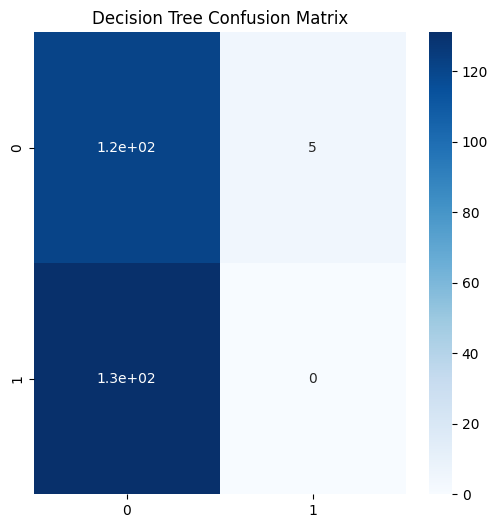


Random Forest Confusion Matrix:
[[ 88  38]
 [105  26]]


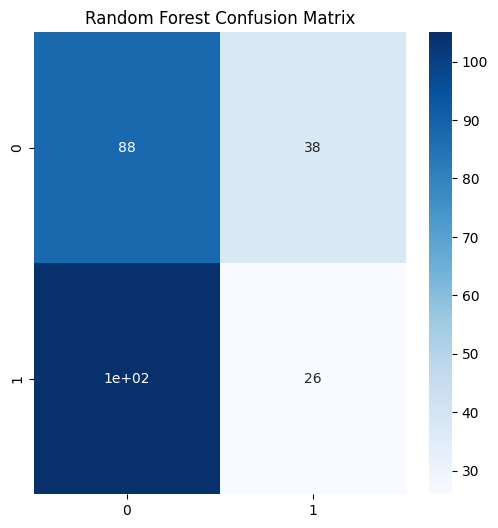


Logistic Regression Confusion Matrix:
[[125   1]
 [131   0]]


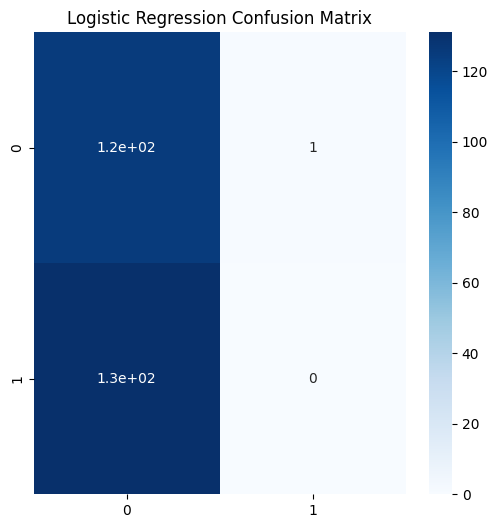

In [143]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate and print confusion matrix for Decision Tree model
dt_cm = confusion_matrix(y_test, dt_pred)
print("Decision Tree Confusion Matrix:")
print(dt_cm)

# Plot confusion matrix for Decision Tree model
plt.figure(figsize=(6, 6))
sns.heatmap(dt_cm, annot=True, cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Generate and print confusion matrix for Random Forest model
rf_cm = confusion_matrix(y_test, rf_pred)
print("\nRandom Forest Confusion Matrix:")
print(rf_cm)

# Plot confusion matrix for Random Forest model
plt.figure(figsize=(6, 6))
sns.heatmap(rf_cm, annot=True, cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# Generate and print confusion matrix for Logistic Regression model
lr_cm = confusion_matrix(y_test, lr_pred)
print("\nLogistic Regression Confusion Matrix:")
print(lr_cm)

# Plot confusion matrix for Logistic Regression model
plt.figure(figsize=(6, 6))
sns.heatmap(lr_cm, annot=True, cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()



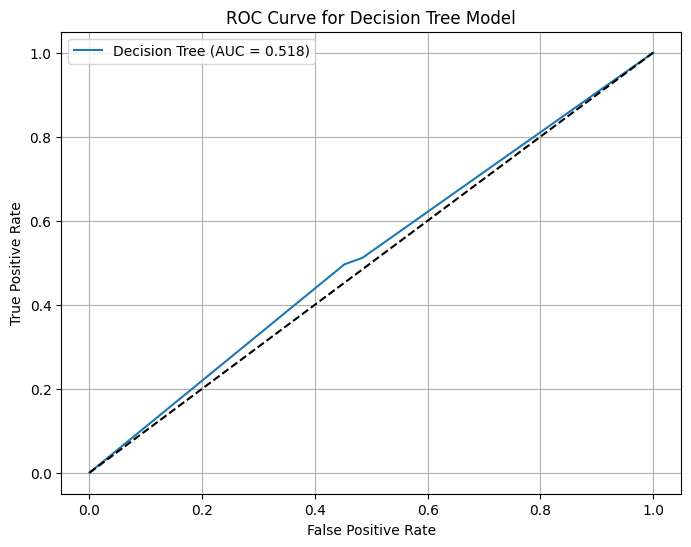

In [149]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Ensure y_test is in binary form for ROC
le = LabelEncoder()
y_test_binary = le.fit_transform(y_test.values if isinstance(y_test, pd.Series) else y_test)

# Get predicted probabilities from models
dt_pred_proba = dt_model.predict_proba(X_test)

# ROC for Decision Tree
dt_fpr, dt_tpr, _ = roc_curve(y_test_binary, dt_pred_proba[:, 1])
dt_auc = auc(dt_fpr, dt_tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Model')
plt.legend()
plt.grid(True)
plt.show()


In [151]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
dt_acc = accuracy_score(y_test, dt_pred)
lr_acc = accuracy_score(y_test, lr_pred)

# Create a table
accuracy_table = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression'],
    'Accuracy': [dt_acc, lr_acc]
})

# Print the table
print(accuracy_table)


                 Model  Accuracy
0        Decision Tree  0.470817
1  Logistic Regression  0.486381


In [152]:
from sklearn.metrics import classification_report, confusion_matrix

# Decision Tree
print("Decision Tree:")
print(classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))

# Logistic Regression
print("Logistic Regression:")
print(classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))


Decision Tree:
              precision    recall  f1-score   support

     Disease       0.48      0.96      0.64       126
      Normal       0.00      0.00      0.00       131

    accuracy                           0.47       257
   macro avg       0.24      0.48      0.32       257
weighted avg       0.24      0.47      0.31       257

[[121   5]
 [131   0]]
Logistic Regression:
              precision    recall  f1-score   support

     Disease       0.49      0.99      0.65       126
      Normal       0.00      0.00      0.00       131

    accuracy                           0.49       257
   macro avg       0.24      0.50      0.33       257
weighted avg       0.24      0.49      0.32       257

[[125   1]
 [131   0]]
